In [1]:
from IPython.display import display

import pandas as pandas
import matplotlib.pyplot as plt
import seaborn as sns

data = pandas.read_csv("data/bialaczka.csv", header=0)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 23 columns):
Unnamed: 0    20 non-null float64
Unnamed: 1    410 non-null int64
1             410 non-null int64
2             410 non-null int64
3             410 non-null int64
4             410 non-null int64
5             410 non-null int64
6             410 non-null int64
7             410 non-null int64
8             410 non-null int64
9             410 non-null int64
10            410 non-null int64
11            410 non-null int64
12            410 non-null int64
13            410 non-null int64
14            410 non-null int64
15            410 non-null int64
16            410 non-null int64
17            410 non-null int64
18            410 non-null int64
19            410 non-null int64
20            410 non-null int64
Class         410 non-null int64
dtypes: float64(1), int64(22)
memory usage: 73.8 KB


In [2]:
data.drop(['Unnamed: 0', 'Unnamed: 1'], axis=1, inplace=True)
data.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', 'Class'],
      dtype='object')

In [276]:
data.describe()

1           2           3           4           5           6  \
count  410.000000  410.000000  410.000000  410.000000  410.000000  410.000000   
mean     1.843902    1.926829    1.153659    4.158537    1.570732    1.412195   
std      0.363391    0.752835    0.361062    2.143219    0.495576    0.492831   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      2.000000    1.000000    1.000000    2.000000    1.000000    1.000000   
50%      2.000000    2.000000    1.000000    4.000000    2.000000    1.000000   
75%      2.000000    2.000000    1.000000    6.000000    2.000000    2.000000   
max      2.000000    3.000000    2.000000    8.000000    2.000000    2.000000   

                7           8           9          10     ...              12  \
count  410.000000  410.000000  410.000000  410.000000     ...      410.000000   
mean     1.439024    1.514634    1.482927    1.434146     ...        1.573171   
std      0.496874    0.500396    0.500319    0.496250     ...        0.495221   
min      1.000000    1.000000    1.000000    1.000000     ...        1.000000   
25%      1.000000    1.000000    1.000000    1.000000     ...        1.000000   
50%      1.000000    2.000000    1.000000    1.000000     ...        2.000000   
75%      2.000000    2.000000    2.000000    2.000000     ...        2.000000   
max      2.000000    2.000000    2.000000    2.000000     ...        2.000000   

               13          14          15          16          17          18  \
count  410.000000  410.000000  410.000000  410.000000  410.000000  410.000000   
mean     1.500000    1.875610    1.565854    1.697561    1.826829    1.800000   
std      0.500611    0.776577    0.496250    0.459876    0.675641    0.765388   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
50%      1.500000    2.000000    2.000000    2.000000    2.000000    2.000000   
75%      2.000000    2.000000    2.000000    2.000000    2.000000    2.000000   
max      2.000000    3.000000    2.000000    2.000000    3.000000    3.000000   

               19          20       Class  
count  410.000000  410.000000  410.000000  
mean     1.770732    1.500000   10.207317  
std      0.766743    0.500611    5.759945  
min      1.000000    1.000000    1.000000  
25%      1.000000    1.000000    5.000000  
50%      2.000000    1.500000   10.000000  
75%      2.000000    2.000000   15.000000  
max      4.000000    2.000000   20.000000  

[8 rows x 21 columns]

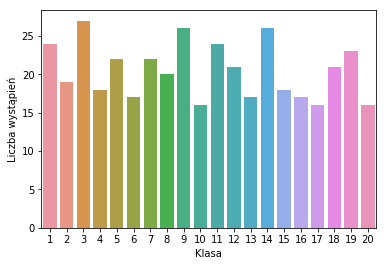

In [17]:
sns.countplot(data['Class'])
plt.xlabel('Klasa')
plt.ylabel('Liczba wystąpień')
plt.show(1)

In [278]:
prediction_var = [str(i) for i in range(1, 21)]

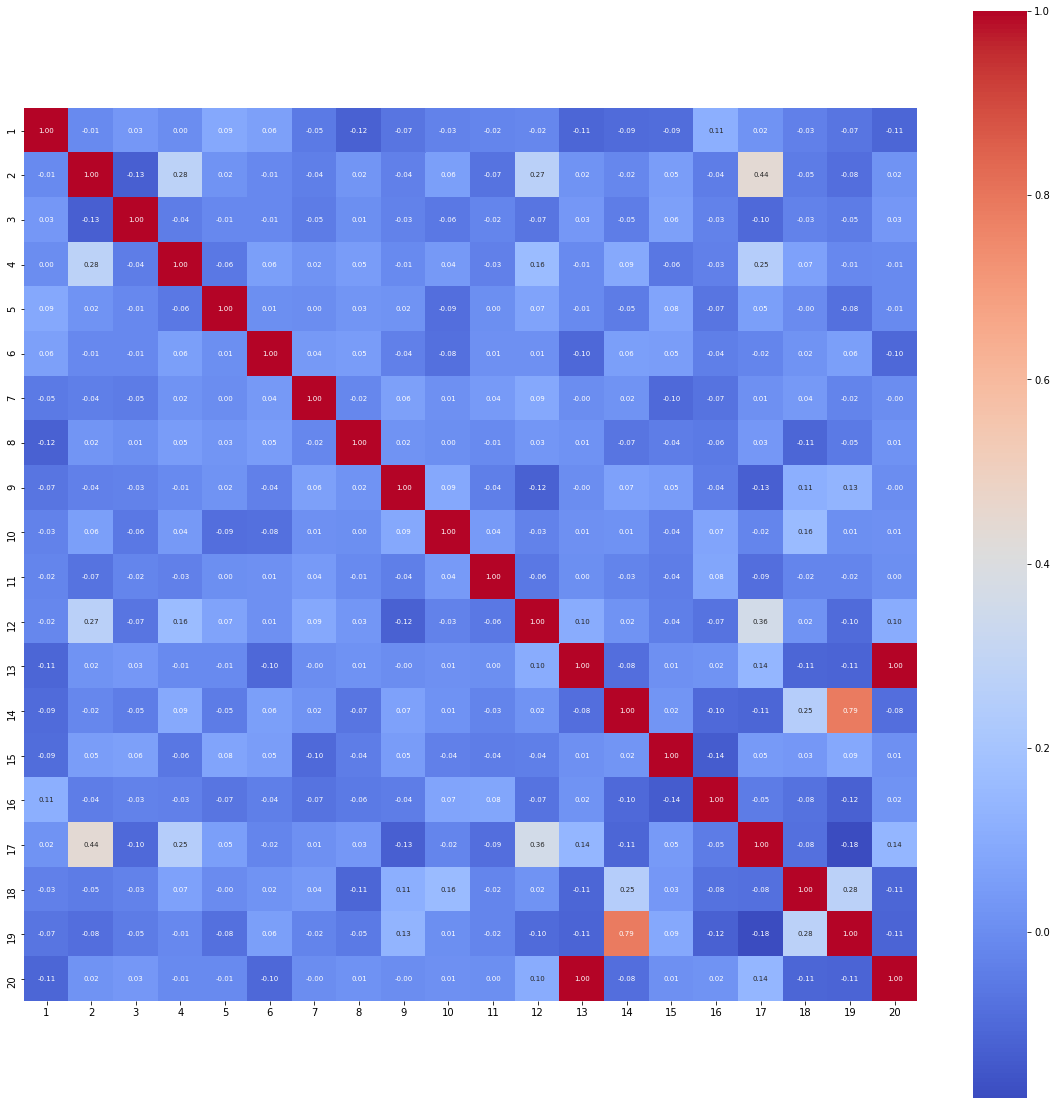

In [279]:
corr = data[prediction_var].corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr, cbar=True,
            square=True,
            annot=True,
            fmt='.2f',
            annot_kws={'size': 7},
            xticklabels=prediction_var,
            yticklabels=prediction_var,
            cmap='coolwarm')
plt.show(2)

In [280]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.3)

In [281]:
train_X = train[prediction_var]
train_y = train.Class

In [282]:
test_X = test[prediction_var]
test_y = test.Class

In [283]:
from sklearn import metrics

In [284]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(7)
model.fit(train_X, train_y)
prediction = model.predict(test_X)

print('KNN')
metrics.accuracy_score(prediction, test_y)

KNN


0.25203252032520324

In [285]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
model.fit(train_X, train_y)
prediction = model.predict(test_X)

print('RandomForest')
metrics.accuracy_score(prediction, test_y)

RandomForest


0.24390243902439024